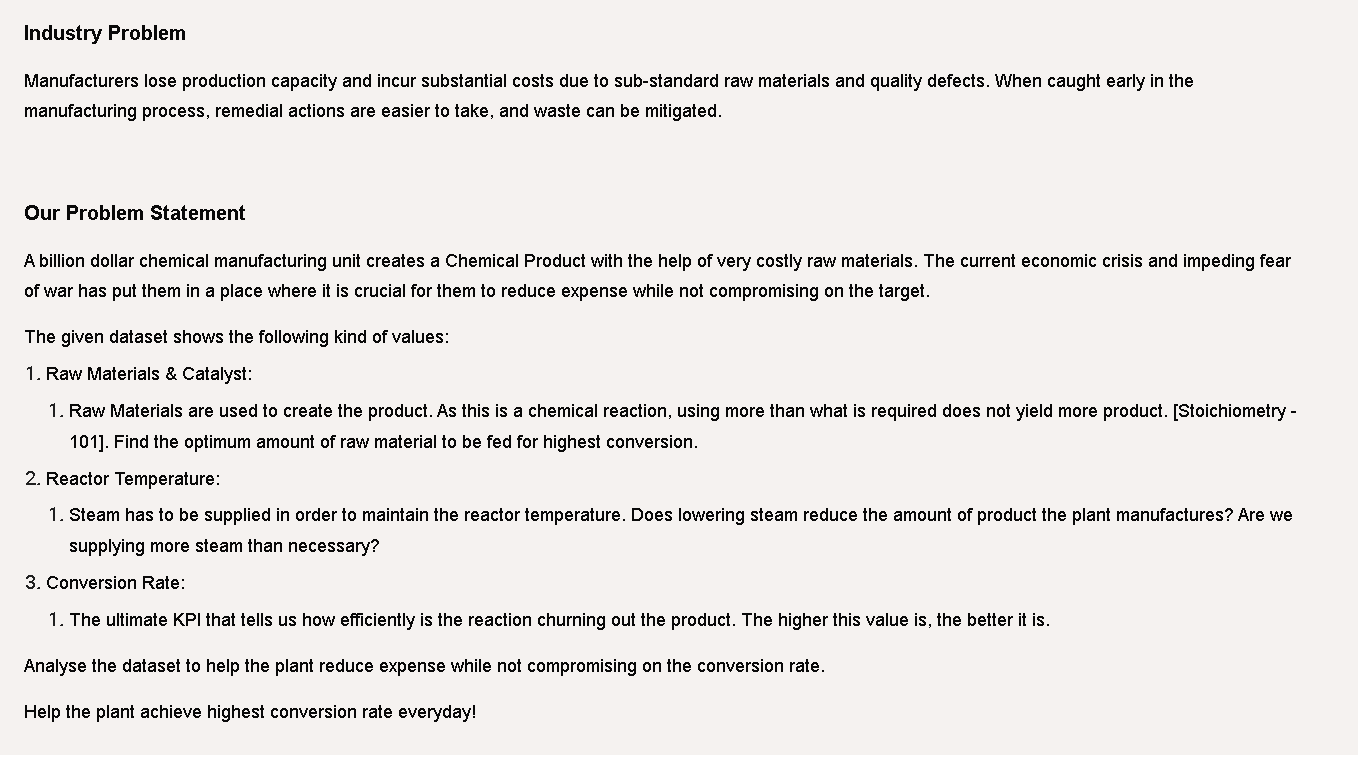

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ChemicalReactor-Dataset.xlsx')
df.head()

,timestamp,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 04 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
0,2022-01-01 00:00:00,25.08,472871.77,10791.68,5745.18,0.0,57029.06,55469.53,89453.85
1,2022-02-01 00:00:00,25.11,460301.06,10791.05,6311.86,0.0,56949.94,54888.71,89423.89
2,2022-03-01 00:00:00,25.63,493577.83,10793.41,6312.29,0.0,57338.40,54887.71,89441.60
3,2022-04-01 00:00:00,25.58,513144.22,10794.50,6313.94,0.0,57447.42,54888.58,89382.46
4,2022-05-01 00:00:00,25.34,522227.51,10801.10,6311.53,0.0,56653.70,54888.14,89249.36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  274 non-null    object 
 1   Conversion Rate (%)        269 non-null    float64
 2   Reactor Catalyst (kg/hr)   274 non-null    float64
 3   Reactor Temperature (¬∞C)  274 non-null    float64
 4   Raw Material - 05 (kg/hr)  274 non-null    float64
 5   Raw Material - 04 (kg/hr)  274 non-null    float64
 6   Raw Material - 03 (kg/hr)  274 non-null    float64
 7   Raw Material - 01 (kg/hr)  274 non-null    float64
 8   Raw Material - 02 (kg/hr)  274 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.4+ KB


In [4]:
100*(df.isnull().sum()/len(df))

timestamp                    0.000000
Conversion Rate (%)          1.824818
Reactor Catalyst (kg/hr)     0.000000
Reactor Temperature (¬∞C)    0.000000
Raw Material - 05 (kg/hr)    0.000000
Raw Material - 04 (kg/hr)    0.000000
Raw Material - 03 (kg/hr)    0.000000
Raw Material - 01 (kg/hr)    0.000000
Raw Material - 02 (kg/hr)    0.000000
dtype: float64

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
# As only the Conversion rate column has missing values and it acoounts to only 1.8 %. We will drop these values
df = df.dropna()

In [7]:
df.describe()

,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 04 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
count,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000,269.000000
mean,26.257249,800184.089108,10800.539926,1898.713792,0.0,53339.039405,56507.856654,86207.149033
std,1.578208,124232.524535,744.011767,2095.317092,0.0,4917.922223,5285.004724,7944.755159
min,13.120000,92136.050000,1700.210000,-193.290000,0.0,0.000000,55.170000,27.920000
25%,25.200000,745126.450000,10829.300000,-9.620000,0.0,51723.670000,55199.830000,85677.320000
50%,26.300000,803810.490000,10865.650000,2378.110000,0.0,54365.180000,57672.220000,88535.950000
75%,27.490000,895266.090000,10988.450000,2926.810000,0.0,55874.500000,58885.900000,89911.710000
max,28.480000,986160.940000,11061.840000,6556.070000,0.0,58152.360000,61440.140000,93501.050000


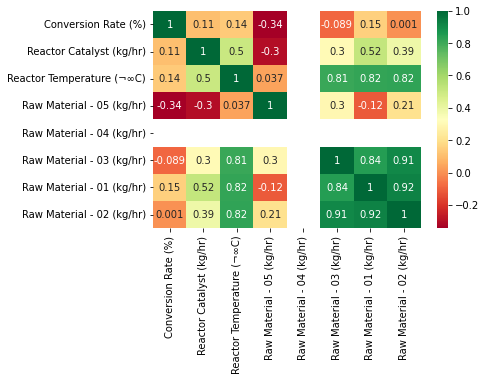

In [8]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

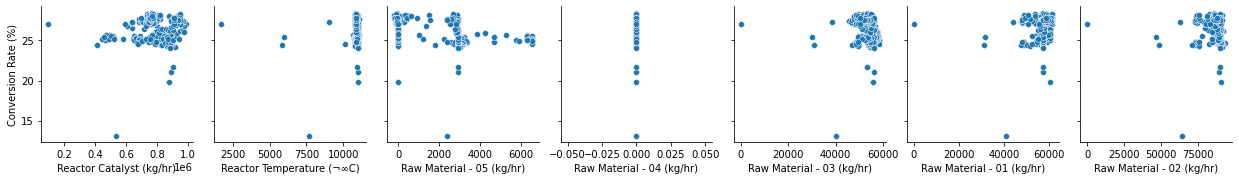

In [9]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])
plt.show()

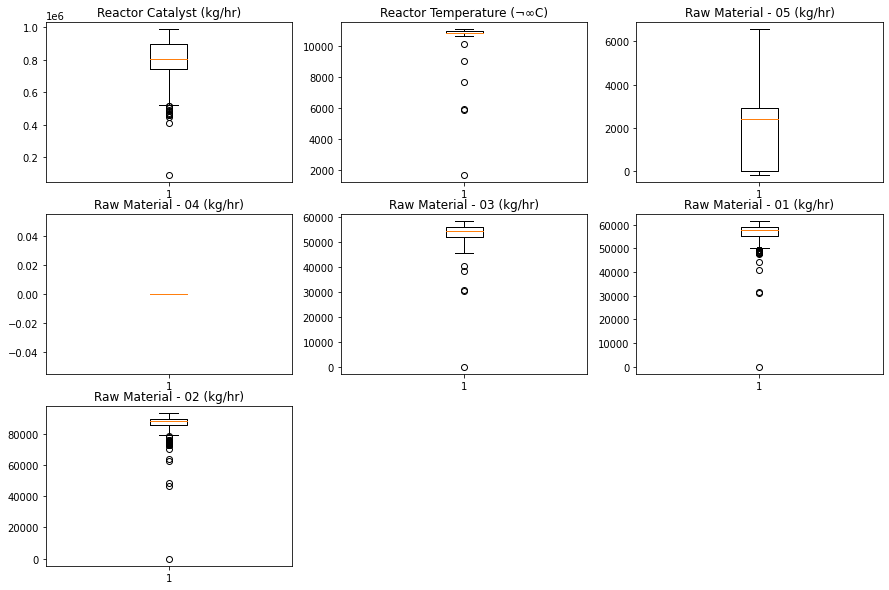

In [10]:
features = ['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)']
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(features):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

In [11]:
df.shape

(269, 9)

In [12]:
num_var = df.select_dtypes(include='float64')
num_var = num_var.columns
num_var

Index(['Conversion Rate (%)', 'Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'],
      dtype='object')

In [13]:
# outlier treatment using I!R
for i in num_var:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

In [14]:
#Eliminating rows with less than 22% conversion rate
df = df[df['Conversion Rate (%)']>22]

In [15]:
df['timestamp'].dt.month

0      1
1      2
2      3
3      4
4      5
      ..
266    9
267    9
268    9
269    9
270    9
Name: timestamp, Length: 260, dtype: int64

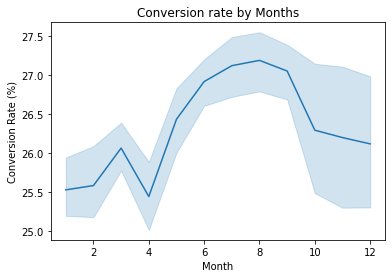

In [16]:
sns.lineplot(x=df['timestamp'].dt.month, y=df['Conversion Rate (%)'], data = df)
plt.xlabel('Month')
plt.title('Conversion rate by Months')
plt.show()

In [17]:
df.shape

(260, 9)

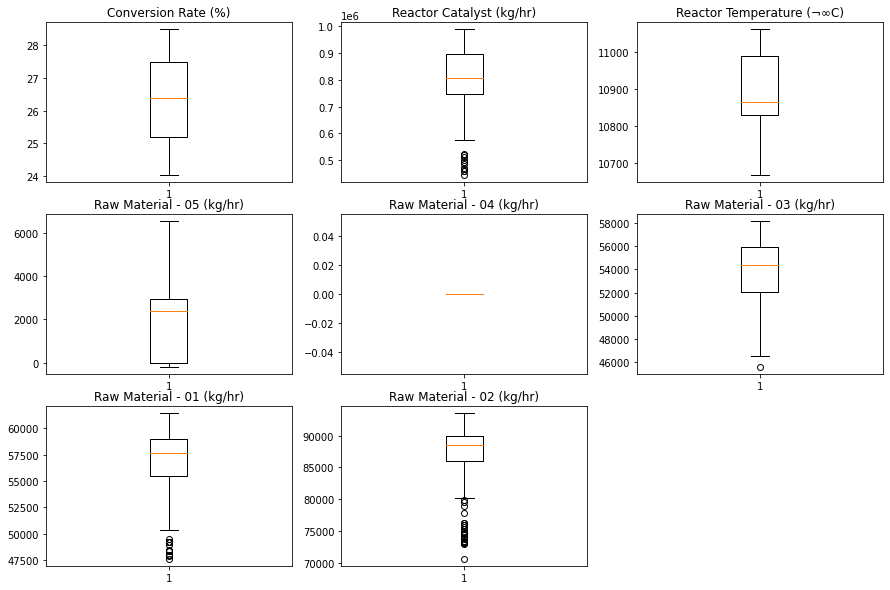

In [18]:
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(num_var):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

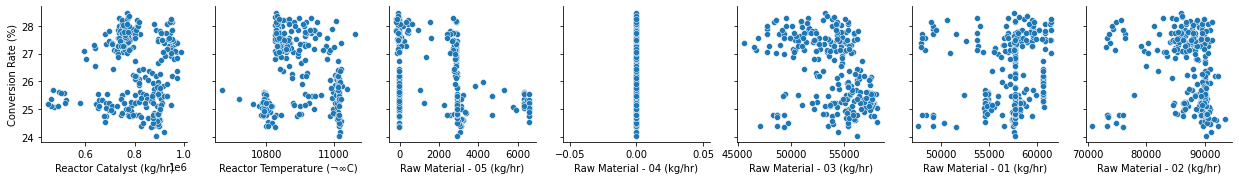

In [19]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])

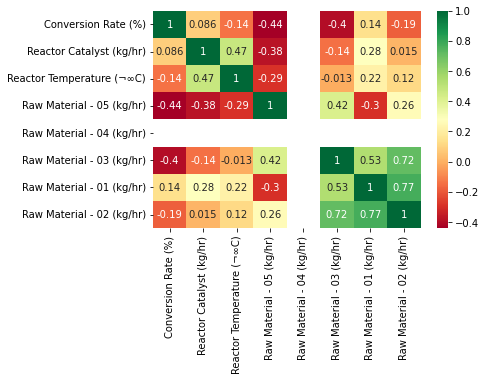

In [20]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [21]:
#There is very little correlation between target variable and feature variables

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.iloc[:,2:]
y= df.iloc[:, 1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.7, random_state=100)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 7)
(78, 7)
(182,)
(78,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
print('Linear Regression','\n','R2 score: ',r2_score(y_test, ypred),'\n MAE    : ', mean_absolute_error(y_test, ypred),'\n MSRE     : ', np.sqrt(mean_squared_error(y_test, ypred)))


Linear Regression 
 R2 score:  0.46683375563949225 
 MAE    :  0.7904024716780593 
 MSRE     :  0.9453861258539819


#### We are getting only 0.46 R2 score which was expected as there is no high correlation between independent and dependent features
#### Lets check with tandom Forest regressor model

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor(random_state=100)

In [29]:
rfm = rfr.fit(X_train, y_train)

In [30]:
print('The training score is: %.2f'%rfm.score(X_train, y_train))

The training score is: 0.96


In [31]:
ytrain_pred = rfm.predict(X_train)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

In [33]:
ytrain_pred = rfm.predict(X_train)

In [34]:
print('The training MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

print('The training MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

print('The training EV is: %.2f'% explained_variance_score(y_train, ytrain_pred))

print('The training r2_score is: %.2f'% r2_score(y_train, ytrain_pred))

The training MAE is: 0.17
The training MSE is: 0.06
The training EV is: 0.96
The training r2_score is: 0.96


In [35]:
ytest_pred = rfm.predict(X_test)

ytest_pred[:10]

array([26.6714, 25.4885, 27.5548, 27.7501, 27.7782, 25.5187, 24.7891,
       24.9535, 27.3783, 27.5589])

In [36]:
print (f'Train Accuracy - : {rfm.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rfm.score(X_test,y_test):.3f}')

Train Accuracy - : 0.956
Test Accuracy - : 0.766


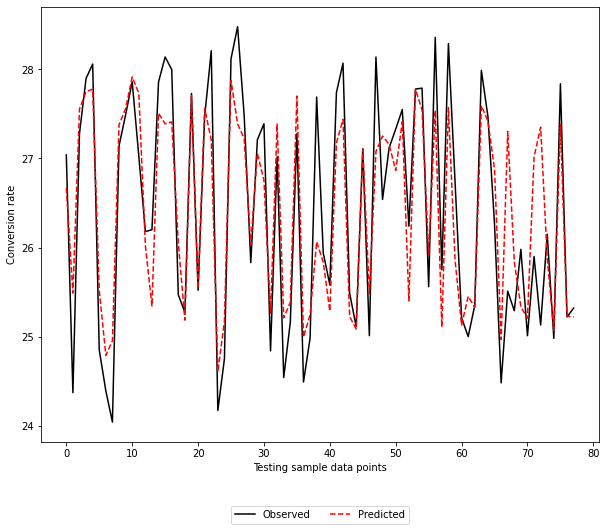

In [37]:
plt.figure(figsize=(10,8))
x_axis = range(len(X_test))

plt.plot(x_axis, y_test, label='Observed', color='k', linestyle='-')
plt.plot(x_axis, ytest_pred, label='Predicted', color='r', linestyle='--')

plt.ylabel('Conversion rate')
plt.xlabel('Testing sample data points')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2)
plt.show()

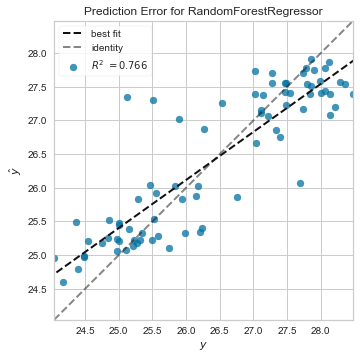

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

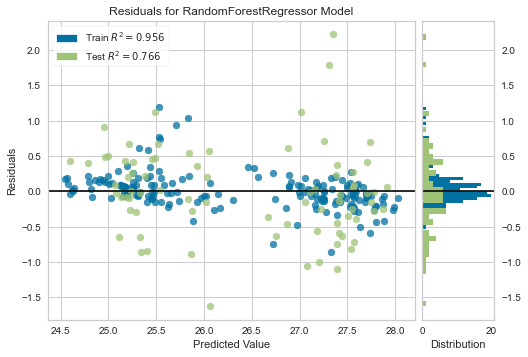

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [40]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score

In [41]:
#Random Forest feature ranking
from sklearn.pipeline import Pipeline

In [42]:
feature_list = list(X.columns)
feature_importance = pd.Series(rfm.feature_importances_, index=feature_list).sort_values(ascending=False)

In [43]:
print(feature_importance)

Raw Material - 05 (kg/hr)    0.435434
Reactor Temperature (¬∞C)    0.307926
Raw Material - 03 (kg/hr)    0.093292
Raw Material - 01 (kg/hr)    0.063388
Raw Material - 02 (kg/hr)    0.053898
Reactor Catalyst (kg/hr)     0.046063
Raw Material - 04 (kg/hr)    0.000000
dtype: float64


#### Hyperparameter tuning using GridSearch CV

In [44]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 25, stop = 100, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4, 6]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [45]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [46]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [47]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=100), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [48]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [49]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.812
Test Accuracy - : 0.757


In [50]:
ytest_grid_pred = rf_Grid.predict(X_test)
ytest_grid_pred[:10]

array([26.94590149, 25.42298842, 27.33686162, 27.59296432, 27.59296432,
       25.44829797, 24.89466781, 24.9174442 , 27.3398703 , 27.50534937])

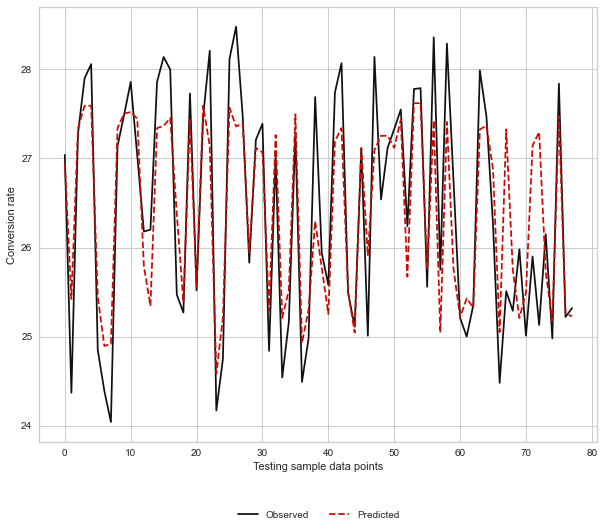

In [51]:
plt.figure(figsize=(10,8))
x_axis = range(len(X_test))

plt.plot(x_axis, y_test, label='Observed', color='k', linestyle='-')
plt.plot(x_axis, ytest_grid_pred, label='Predicted', color='r', linestyle='--')

plt.ylabel('Conversion rate')
plt.xlabel('Testing sample data points')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2)
plt.show()

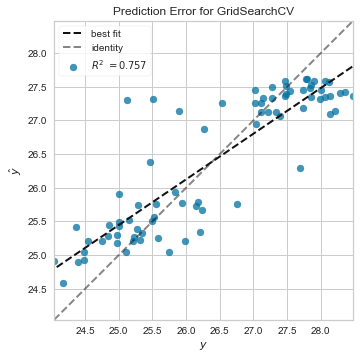

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf_Grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

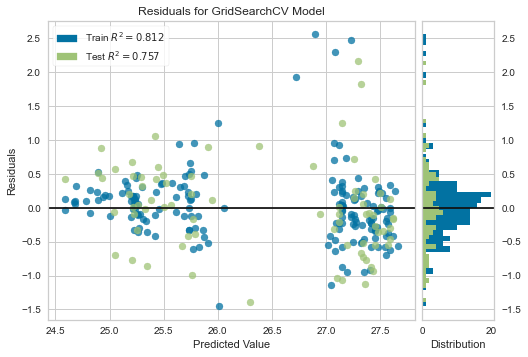

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf_Grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [54]:
rf_Grid.best_estimator_.feature_importances_

array([0.03747387, 0.30103986, 0.48890058, 0.        , 0.10412954,
       0.04498037, 0.0234758 ])

In [55]:
feature_list = list(X.columns)
feature_importance = pd.Series(rf_Grid.best_estimator_.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

Raw Material - 05 (kg/hr)    0.488901
Reactor Temperature (¬∞C)    0.301040
Raw Material - 03 (kg/hr)    0.104130
Raw Material - 01 (kg/hr)    0.044980
Reactor Catalyst (kg/hr)     0.037474
Raw Material - 02 (kg/hr)    0.023476
Raw Material - 04 (kg/hr)    0.000000
dtype: float64
